In [ ]:
# 2023-01
# trying to use mean field theory (ish) to determine
# why the standard Game of Life rule is good
# sort of kind of works

In [68]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from functools import partial

from itertools import product

In [6]:
def p_next(p, rule_b, rule_s):
    out_b = sum([sp.special.binom(8, n) * p**n * (1-p)**(9-n) for n in rule_b])
    out_s = sum([sp.special.binom(8, n) * p**(n+1) * (1-p)**(9-(n+1)) for n in rule_s])
    return out_b + out_s

In [122]:
def wall_next(p, rule_b, rule_s):
    terms = [sp.special.binom(3, n) * p**n * (1-p)**(3-n) for n in rule_b if n <= 3]
    if len(terms) == 0: # for vectorization of non-wall-invading rules
        return 0. * p
    else:
        return sum(terms)

In [77]:
# d(x^n)/dx
def dpow(x, n):
    if n == 0:
        return 0
    return n * x**(n-1)

In [78]:
def dp_next(p, rule_b, rule_s):
    out_b = sum([sp.special.binom(8, n) * dpow(p, n) * (1-p)**(9-n)
                 - sp.special.binom(8, n) * p**n * dpow(1-p, 9-n)
                 for n in rule_b])
    out_s = sum([sp.special.binom(8, n) * dpow(p, n+1) * (1-p)**(9-(n+1))
                 - sp.special.binom(8, n) * p**(n+1) * dpow(1-p, 9-(n+1))
                 for n in rule_s])
    return out_b + out_s

In [138]:
def rulestring(rule_b, rule_s):
    return ('B' + ''.join(map(str, rule_b)) + 
            '/S' + ''.join(map(str, rule_s)))

In [146]:
def ruletuple(rule_str):
    str_b, str_s = rule_str.split('/')
    rule_b = tuple(map(int, str_b[1:]))
    rule_s = tuple(map(int, str_s[1:]))
    assert (rule_str == rulestring(rule_b, rule_s)), f"rule {rule_str} did not match reconstruction {rulestring(rule_b, rule_s)}"
    return (rule_b, rule_s)

In [140]:
a, b = 'af/kjdsaf'.split('/')

In [141]:
a

'af'

In [137]:
''.join(map(str, (2,3,4)))

'234'

In [14]:
cgol = ((3,), (2,3))

-0.07945829427409778


In [133]:
EPS = 1e-5
better_rules = 0
for bits in product([0, 1], repeat=15):
    bits
    rule = (tuple(i for i in range(3, 9) if bits[i-3]),
            tuple(i for i in range(0, 9) if bits[9+i-3]))
    p = .5
    for _ in range(50):
        if p < EPS or p > 1-EPS:
            break
        pn = p_next(p, *rule)
        if np.abs(p - pn) < EPS:
            p = pn
            break
        p = pn
    if EPS <= p <= 1-EPS:
        score = dp_next(p, *rule)
        if -.0795 < score < .0795:
            print(p, score, rule)
            print(bits)
            better_rules += 1

0.0002594260927981822 0.004145168034796017 ((), (1, 2, 3, 4, 5, 6, 7, 8))
(0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1)
0.9997405739072016 0.004145168034798363 ((8,), (0, 1, 2, 3, 4, 5, 6, 7, 8))
(0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
0.7712798796025357 0.06753947204992047 ((7, 8), (1, 2, 3, 4, 5, 6, 7))
(0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0)
0.7712862995262602 0.06724874065548861 ((7, 8), (0, 1, 2, 3, 4, 5, 6, 7))
(0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)
0.7218927520895311 -0.04263110058951802 ((6, 7, 8), (0, 1, 3, 4, 5, 6, 8))
(0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1)
0.6269679434863913 -0.006959394005372488 ((5,), (1, 3, 4, 5, 6))
(0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0)
0.6439848321813519 0.03332081920762403 ((5,), (1, 3, 4, 5, 6, 8))
(0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1)
0.5440941729976569 -0.05218200069530721 ((5,), (1, 2, 3, 4, 5))
(0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0)
0.5482482930514786 -0.02894879524498556 ((5,), (1, 2, 3, 4, 5, 8))


0.5991437163776001 0.0547827747987375 ((4,), (3, 4, 5, 6))
(0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0)
0.4918966810079444 0.07224081686222061 ((4,), (2, 3, 4, 6))
(0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0)
0.6995604715578428 0.05430628617407429 ((4,), (2, 3, 4, 5, 6, 7))
(0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0)
0.6037657083985608 -0.05443082400370469 ((4,), (1, 3, 4, 5, 6))
(0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0)
0.615170379404291 0.026295634331858664 ((4,), (1, 3, 4, 5, 6, 8))
(0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1)
0.523593997897832 -0.04291283270229879 ((4,), (1, 2, 3, 4, 6, 7))
(0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0)
0.5265632101332614 -0.0002421035032472707 ((4,), (1, 2, 3, 4, 6, 7, 8))
(0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1)
0.700457083824095 0.033344457590200216 ((4,), (1, 2, 3, 4, 5, 6, 7))
(0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0)
0.5995624283588252 0.04345006134772311 ((4,), (0, 3, 4, 5, 6))
(0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0)
0

0.6524504491118537 -0.06169281017281869 ((4, 6, 8), (2, 4, 5, 6))
(0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0)
0.6769860112383983 0.01946380330688291 ((4, 6, 8), (2, 4, 5, 6, 8))
(0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1)
0.5096000364633735 -0.061094687574981515 ((4, 6, 8), (2, 3, 4, 7))
(0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0)
0.5118512261476466 -0.03876773044374521 ((4, 6, 8), (2, 3, 4, 7, 8))
(0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1)
0.5562897195970758 -0.07420467885356702 ((4, 6, 8), (2, 3, 4, 6))
(0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0)
0.5613634041085247 -0.019189237643738977 ((4, 6, 8), (2, 3, 4, 6, 8))
(0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1)
0.635197402926121 0.00034045900070678314 ((4, 6, 8), (1, 3, 4, 5, 7, 8))
(0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1)
0.6783162430323818 -0.016820377655250296 ((4, 6, 8), (1, 2, 4, 5, 6, 8))
(0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1)
0.6181422341855883 -0.07612133776521463 ((4, 6, 8), (0, 3, 4, 5, 7))
(0, 1, 0, 1

0.49597145022889355 0.06091923044748143 ((4, 5, 8), (0, 3, 4))
(0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0)
0.49794422252326653 0.0651083416691138 ((4, 5, 8), (0, 3, 4, 8))
(0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1)
0.5135331467380065 0.05032726095032092 ((4, 5, 8), (0, 3, 4, 7))
(0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0)
0.5162283407600524 0.0629032889933629 ((4, 5, 8), (0, 3, 4, 7, 8))
(0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)
0.6046970420484635 0.07536366278552697 ((4, 5, 8), (0, 3, 4, 6, 7))
(0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0)
0.6065828488435877 -0.027671302903025552 ((4, 5, 8), (0, 2, 4, 5, 7, 8))
(0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1)
0.5435846694437438 -0.05411801899681956 ((4, 5, 8), (0, 2, 3, 5, 7))
(0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0)
0.5477409664679952 -0.00834080720763608 ((4, 5, 8), (0, 2, 3, 5, 7, 8))
(0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1)
0.6137004698880419 0.00012890214345340212 ((4, 5, 8), (0, 2, 3, 5, 6, 8))
(0, 1, 1, 0, 0, 

0.6494695761477751 0.06494157944570922 ((4, 5, 7, 8), (0, 2, 4, 5, 7, 8))
(0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1)
0.5688987413050839 0.013948284257273347 ((4, 5, 7, 8), (0, 2, 3, 5, 7))
(0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0)
0.6598385758338111 0.060852591612839735 ((4, 5, 7, 8), (0, 2, 3, 5, 6, 8))
(0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1)
0.5361520418484637 -0.03452644892180928 ((4, 5, 7, 8), (0, 2, 3, 4, 5))
(0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0)
0.7743257873726361 -0.07632923023946636 ((4, 5, 7, 8), (0, 1, 3, 5, 6, 7))
(0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0)
0.6517238533878846 0.02530639192814721 ((4, 5, 7, 8), (0, 1, 2, 4, 5, 7, 8))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1)
0.5 -0.0546875 ((4, 5, 7, 8), (0, 1, 2, 3, 6))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0)
0.5019074447767894 -0.028371718251266054 ((4, 5, 7, 8), (0, 1, 2, 3, 6, 8))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1)
0.582409527893175 -0.00422980047792787 ((4, 5, 7, 8), (0, 1, 2, 

0.5454929913563311 -0.005057356964093096 ((4, 5, 6, 7), (1, 2, 3, 4, 5))
(0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0)
0.6155096002720846 -0.0362525386112687 ((4, 5, 6, 7), (1, 2, 3, 4, 5, 6, 8))
(0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1)
0.7161346804523933 -0.07807338037545952 ((4, 5, 6, 7), (0, 4, 5, 7, 8))
(0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1)
0.5693160041477616 0.06802466875076624 ((4, 5, 6, 7), (0, 3, 5))
(0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0)
0.6666664977154436 -0.02423179307987222 ((4, 5, 6, 7), (0, 2, 5, 6))
(0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0)
0.6981226452470581 0.015726656072073464 ((4, 5, 6, 7), (0, 2, 5, 6, 8))
(0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1)
0.6138465173022467 -0.05351083173679799 ((4, 5, 6, 7), (0, 2, 4, 6))
(0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0)
0.6273601968184376 0.0413396880808391 ((4, 5, 6, 7), (0, 2, 4, 6, 8))
(0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1)
0.4834187270816431 0.02517862351967537 ((4, 5, 6, 7), (0, 2, 3))


0.34805063368476274 -0.052261383660922034 ((3,), (1, 2, 5))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0)
0.3481220748577332 -0.050893444484911406 ((3,), (1, 2, 5, 8))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1)
0.3491388309387735 -0.036380589976485384 ((3,), (1, 2, 5, 7))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0)
0.3492133292746452 -0.03494899557068856 ((3,), (1, 2, 5, 7, 8))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1)
0.35579765857857754 0.026622332327252612 ((3,), (1, 2, 5, 6))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0)
0.35589173163266197 0.028404359254580486 ((3,), (1, 2, 5, 6, 8))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1)
0.357192161687634 0.047182043340845414 ((3,), (1, 2, 5, 6, 7))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0)
0.3572918971014438 0.0490682600723657 ((3,), (1, 2, 5, 6, 7, 8))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1)
0.39635971113566004 -0.07095128450693672 ((3,), (1, 2, 4, 6))
(1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0)
0.39658651881698426 -

0.47227035669079265 -0.02552285824033862 ((3, 8), (0, 1, 2, 3, 5, 6, 7))
(1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0)
0.4734367898667389 -0.00024210350324649355 ((3, 8), (0, 1, 2, 3, 5, 6, 7, 8))
(1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1)
0.602498942593988 -0.008700089828184376 ((3, 8), (0, 1, 2, 3, 4, 5, 6, 8))
(1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1)
0.3730538993141802 -0.0669408266985082 ((3, 7), (2, 3))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0)
0.3731853822055138 -0.06514630374639921 ((3, 7), (2, 3, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1)
0.3748633777343455 -0.050272638535716896 ((3, 7), (2, 3, 7))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0)
0.37500286572091424 -0.04833949226038192 ((3, 7), (2, 3, 7, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1)
0.3846845436506766 -0.0069830084565915 ((3, 7), (2, 3, 6))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0)
0.38486838260113754 -0.004354640343661398 ((3, 7), (2, 3, 6, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0

0.7730005948249796 0.0056422858514076635 ((3, 7, 8), (0, 3, 4, 5, 6, 7))
(1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0)
0.42775274608382274 -0.037231970579638674 ((3, 7, 8), (0, 2, 3, 5, 7))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0)
0.4282189452790559 -0.029125949381758276 ((3, 7, 8), (0, 2, 3, 5, 7, 8))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1)
0.5 -0.0078125 ((3, 7, 8), (0, 2, 3, 4, 6, 7))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0)
0.502008756607906 0.02814626639722556 ((3, 7, 8), (0, 2, 3, 4, 6, 7, 8))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1)
0.5555669023765732 -0.05207230342541924 ((3, 7, 8), (0, 2, 3, 4, 5, 7))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0)
0.5607549104261722 0.026855558313006678 ((3, 7, 8), (0, 2, 3, 4, 5, 7, 8))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1)
0.6260413925705827 0.036414427920052214 ((3, 7, 8), (0, 2, 3, 4, 5, 6))
(1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0)
0.7746923851446379 -0.05810602027677615 ((3, 7, 8), (0, 2, 3, 4, 5, 6, 7))
(

0.0001609832774773862 0.002575729638182013 ((3, 6, 8), (1, 4, 6, 7))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0)
0.00023271117090059029 0.0037233702748607415 ((3, 6, 8), (1, 4, 6, 7, 8))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1)
0.4394513296284005 0.024378903012317654 ((3, 6, 8), (1, 3, 4))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0)
0.44008444712167427 0.032321439571280364 ((3, 6, 8), (1, 3, 4, 8))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1)
0.5416924690548108 -0.04149802493981669 ((3, 6, 8), (1, 3, 4, 5))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0)
0.5457556003693331 -0.0018775951493761878 ((3, 6, 8), (1, 3, 4, 5, 8))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1)
0.6778174049692148 -0.05244437451899797 ((3, 6, 8), (1, 3, 4, 5, 6, 8))
(1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1)
0.34220078559694933 -0.05150020077648604 ((3, 6, 8), (1, 2, 6))
(1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0)
0.34226208813369274 -0.05030762349689882 ((3, 6, 8), (1, 2, 6, 8))
(1, 0, 0, 1, 0, 1, 

0.5380006556310936 -0.020764631814653184 ((3, 6, 7), (0, 2, 3, 4, 6))
(1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0)
0.5419352904785864 0.03833658247855831 ((3, 6, 7), (0, 2, 3, 4, 6, 8))
(1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1)
0.6282358542973412 -0.07072064485661053 ((3, 6, 7), (0, 2, 3, 4, 5, 7))
(1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0)
0.3545107374650718 0.07632699395012771 ((3, 6, 7), (0, 1, 3))
(1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0)
0.3546067092249744 0.07785544782150636 ((3, 6, 7), (0, 1, 3, 8))
(1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1)
0.45116922365372797 -0.014277642603952895 ((3, 6, 7), (0, 1, 3, 4))
(1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0)
0.451942947881268 -0.003370526655261219 ((3, 6, 7), (0, 1, 3, 4, 8))
(1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1)
0.4594261221788136 0.06888076382137442 ((3, 6, 7), (0, 1, 3, 4, 7))
(1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0)
0.5627762055623775 -0.05799796721818265 ((3, 6, 7), (0, 1, 3, 4, 5))
(1, 0, 0, 1, 1, 0,

0.4858542618778159 -0.044000432546457136 ((3, 5, 8), (0, 3, 4, 7))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0)
0.48733004632087795 -0.028183131399486805 ((3, 5, 8), (0, 3, 4, 7, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)
0.5253150706785016 -0.013672279058293046 ((3, 5, 8), (0, 3, 4, 6))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0)
0.5284530312268536 0.019952905461400217 ((3, 5, 8), (0, 3, 4, 6, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1)
0.43004061070699634 0.04322459983746349 ((3, 5, 8), (0, 2, 4))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0)
0.430571003876142 0.049652216553168343 ((3, 5, 8), (0, 2, 4, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1)
0.5251995649993291 -0.027002842612908307 ((3, 5, 8), (0, 2, 4, 5))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0)
0.5282833296862383 0.003073528969211148 ((3, 5, 8), (0, 2, 4, 5, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1)
0.6262699737535661 -0.057755617828447625 ((3, 5, 8), (0, 2, 4, 5, 6))
(1, 0, 1, 0, 0, 1, 1, 0,

0.6567819838364755 0.06332623361348522 ((3, 5, 7, 8), (4, 5, 6))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0)
0.48429898588800746 -0.03928131989139899 ((3, 5, 7, 8), (3, 4))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0)
0.485737049590261 -0.026177597423922838 ((3, 5, 7, 8), (3, 4, 8))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
0.49799243571661495 0.03479202216832111 ((3, 5, 7, 8), (3, 4, 7))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0)
0.5 0.0546875 ((3, 5, 7, 8), (3, 4, 7, 8))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1)
0.5465222187376723 0.06490128160105624 ((3, 5, 7, 8), (3, 4, 6))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0)
0.6503660983968721 -0.003371105109031325 ((3, 5, 7, 8), (3, 4, 5, 7, 8))
(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1)
0.545751257692319 0.02122246686347834 ((3, 5, 7, 8), (2, 4, 5))
(1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0)
0.5504014884947555 0.060839140552914284 ((3, 5, 7, 8), (2, 4, 5, 8))
(1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1)
0.695280269

0.39020170998546067 -0.0665440346995625 ((3, 5, 6, 8), (1, 2, 7))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0)
0.3903990552004043 -0.06281702077142304 ((3, 5, 6, 8), (1, 2, 7, 8))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1)
0.40279734107068654 0.046851822466341814 ((3, 5, 6, 8), (1, 2, 6))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0)
0.4030921174921812 0.05213923270213722 ((3, 5, 6, 8), (1, 2, 6, 8))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1)
0.49817493502155785 -0.06677389429162167 ((3, 5, 6, 8), (1, 2, 4, 7))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0)
0.5 -0.0390625 ((3, 5, 6, 8), (1, 2, 4, 7, 8))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1)
0.6567989362251359 0.01072784750327238 ((3, 5, 6, 8), (1, 2, 4, 5, 7, 8))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1)
0.5251672099628828 0.008271816397510734 ((3, 5, 6, 8), (1, 2, 3, 6, 7))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0)
0.528415935983845 0.06931892396636938 ((3, 5, 6, 8), (1, 2, 3, 6, 7, 8))
(1, 0, 1, 1, 0, 1, 0, 1, 1

0.5985080277459647 -0.023872212338254983 ((3, 5, 6, 7, 8), (1, 4, 5))
(1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0)
0.6091210286619617 0.018215684475324595 ((3, 5, 6, 7, 8), (1, 4, 5, 8))
(1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1)
0.6714930139454403 -0.008234611493972865 ((3, 5, 6, 7, 8), (1, 4, 5, 7))
(1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0)
0.7155856983887986 -0.03445676470260528 ((3, 5, 6, 7, 8), (1, 3, 5, 6, 8))
(1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1)
0.6415885219542663 -0.06409617031766124 ((3, 5, 6, 7, 8), (1, 3, 4, 6, 8))
(1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1)
0.7401873617172288 0.04001246685820081 ((3, 5, 6, 7, 8), (1, 3, 4, 5, 7, 8))
(1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1)
0.39159370799572985 -0.06401873760646687 ((3, 5, 6, 7, 8), (1, 2))
(1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0)
0.3917979831043702 -0.06019921943727924 ((3, 5, 6, 7, 8), (1, 2, 8))
(1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1)
0.3942319694706027 -0.02634688292354115 ((3, 5, 6, 7, 

0.46238518537373974 -0.06383681750193948 ((3, 4, 8), (0, 2, 3, 4, 5, 8))
(1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1)
0.3706155584232458 -0.049027529035665304 ((3, 4, 8), (0, 1, 6))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0)
0.3707415956478104 -0.04679516796720448 ((3, 4, 8), (0, 1, 6, 8))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1)
0.37237326435888063 -0.02570985776447643 ((3, 4, 8), (0, 1, 6, 7))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0)
0.3725078387705608 -0.023325029491179552 ((3, 4, 8), (0, 1, 6, 7, 8))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1)
0.3990419473515628 0.01103386571864548 ((3, 4, 8), (0, 1, 5))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0)
0.3993026717439143 0.015260945833493411 ((3, 4, 8), (0, 1, 5, 8))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1)
0.4023277561269519 0.050943865698930973 ((3, 4, 8), (0, 1, 5, 7))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0)
0.4026204490126929 0.055675077879821594 ((3, 4, 8), (0, 1, 5, 7, 8))
(1, 1, 0, 0, 0, 1, 1, 1, 0, 0

0.5866537419386215 0.016447564993173014 ((3, 4, 6), (4, 5, 7))
(1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0)
0.48106724080999325 -0.0032262096059746392 ((3, 4, 6), (3, 6, 7))
(1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0)
0.4824759038767016 0.018278076883520344 ((3, 4, 6), (3, 6, 7, 8))
(1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1)
0.5375821102731666 -0.05139799646039145 ((3, 4, 6), (3, 5, 7, 8))
(1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1)
0.5929397334976925 0.02293772150150608 ((3, 4, 6), (3, 5, 6))
(1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0)
0.6176087590650747 -0.06546180670700408 ((3, 4, 6), (3, 4, 6, 7))
(1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0)
0.4355513309154809 -0.07270763743726949 ((3, 4, 6), (2, 6, 7))
(1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0)
0.4360824954163527 -0.06332113608064283 ((3, 4, 6), (2, 6, 7, 8))
(1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1)
0.48111228656742616 -0.010466663519038466 ((3, 4, 6), (2, 5, 7))
(1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0)
0.4

0.529945490916082 -0.033249996861039466 ((3, 4, 6, 8), (0, 1, 2, 3, 4, 5, 6))
(1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0)
0.6250345607459397 0.048894779700207724 ((3, 4, 6, 7), (4, 5, 7))
(1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0)
0.48196604487435435 -0.04508729145548884 ((3, 4, 6, 7), (3, 6))
(1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0)
0.48333936528360666 -0.02456667329043616 ((3, 4, 6, 7), (3, 6, 8))
(1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1)
0.557102701832316 0.03369529559043738 ((3, 4, 6, 7), (3, 5, 7))
(1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0)
0.6340241522420944 0.06298588627785873 ((3, 4, 6, 7), (3, 5, 6))
(1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0)
0.43769959940171527 -0.07323016365597826 ((3, 4, 6, 7), (2, 6, 8))
(1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1)
0.44320125135004756 -0.002804944637635254 ((3, 4, 6, 7), (2, 6, 7))
(1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0)
0.44386747790610653 0.00884765282729516 ((3, 4, 6, 7), (2, 6, 7, 8))
(1, 1, 0, 1, 1, 0, 0, 0,

0.5822334988931264 -0.028514018156619025 ((3, 4, 5), (2, 5, 6, 8))
(1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1)
0.49678523244005807 -0.06999548726808003 ((3, 4, 5), (2, 4, 5))
(1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0)
0.4497532946268894 0.024387685007161042 ((3, 4, 5), (2, 3, 5))
(1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0)
0.6947710089342812 -0.04401194461009239 ((3, 4, 5), (2, 3, 5, 6, 7))
(1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0)
0.4491717114393543 0.011738494198456906 ((3, 4, 5), (2, 3, 4, 7, 8))
(1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1)
0.4876987222569749 0.05661027754495285 ((3, 4, 5), (2, 3, 4, 5, 7))
(1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0)
0.437290965718898 -0.016497728297764414 ((3, 4, 5), (1, 6))
(1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0)
0.43787210491802964 -0.00796120753807561 ((3, 4, 5), (1, 6, 8))
(1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1)
0.44374599879225546 0.0526054695225292 ((3, 4, 5), (1, 6, 7))
(1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0)


0.6569000876866217 -0.0378629189995201 ((3, 4, 5, 8), (0, 1, 3, 4, 6, 7, 8))
(1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1)
0.5936381376156443 -0.06280771772687732 ((3, 4, 5, 8), (0, 1, 2, 5, 6, 8))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1)
0.42417710812839665 -0.02792052693161365 ((3, 4, 5, 8), (0, 1, 2, 4))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0)
0.6174293879681342 -0.053315093752532405 ((3, 4, 5, 8), (0, 1, 2, 4, 6, 7, 8))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1)
0.47000179676716825 0.052320969183125565 ((3, 4, 5, 8), (0, 1, 2, 4, 5))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0)
0.4386123745553474 -0.06509306212287443 ((3, 4, 5, 8), (0, 1, 2, 3, 5, 8))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1)
0.7136552396800034 0.06208846952391367 ((3, 4, 5, 8), (0, 1, 2, 3, 5, 6, 7))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0)
0.5114125207681185 -0.05735640268432274 ((3, 4, 5, 8), (0, 1, 2, 3, 4, 5, 6))
(1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0)
0.5513805202192433 -0.034845

0.4521668767976403 -0.03680956018932652 ((3, 4, 5, 6), (1, 2, 4))
(1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0)
0.5745571151474611 -0.042733160057237374 ((3, 4, 5, 6), (1, 2, 4, 5, 6))
(1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0)
0.647706651763591 -0.03324002316613739 ((3, 4, 5, 6), (1, 2, 4, 5, 6, 7))
(1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0)
0.6274921612294394 -0.02332502949117843 ((3, 4, 5, 6), (1, 2, 3, 6, 7, 8))
(1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1)
0.46591281590552613 -0.04081060713004114 ((3, 4, 5, 6), (1, 2, 3, 5, 8))
(1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1)
0.5252366660980605 0.04926636680912366 ((3, 4, 5, 6), (0, 5))
(1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0)
0.5285769457722674 0.07714374684247749 ((3, 4, 5, 6), (0, 5, 8))
(1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1)
0.6336369763454424 -0.059853756749677745 ((3, 4, 5, 6), (0, 5, 6))
(1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0)
0.6521430742378729 0.045257287915502875 ((3, 4, 5, 6), (0, 5, 6, 8))
(1, 1, 1

0.6027595177475478 -0.023251987061132406 ((3, 4, 5, 6, 8), (0, 1, 3, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0)
0.5506271048842167 -0.03293279180105457 ((3, 4, 5, 6, 8), (0, 1, 2, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0)
0.5555406898156778 0.06310802100528634 ((3, 4, 5, 6, 8), (0, 1, 2, 6, 7, 8))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
0.686874064010667 -0.038951444522471235 ((3, 4, 5, 6, 8), (0, 1, 2, 4, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0)
0.5068907338078917 0.028015638920372343 ((3, 4, 5, 6, 8), (0, 1, 2, 4, 5, 8))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1)
0.662083053845444 -0.023561749881762406 ((3, 4, 5, 6, 8), (0, 1, 2, 4, 5, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0)
0.502313875722942 0.035658235780404446 ((3, 4, 5, 6, 8), (0, 1, 2, 3, 4, 5, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0)
0.723009686199777 0.05976913922570626 ((3, 4, 5, 6, 7), (4, 6, 7))
(1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0)
0.4870120117414542 0

In [159]:
EPS = 1e-5
thresh = 1e-4
good_rules = 0
for bits in product([0, 1], repeat=15):
    bits
    rule = (tuple(i for i in range(3, 9) if bits[i-3]),
            tuple(i for i in range(0, 9) if bits[9+i-3]))
    p = .5
    for _ in range(50):
        if p < EPS or p > 1-EPS:
            break
        pn = p_next(p, *rule)
        if np.abs(p - pn) < EPS:
            p = pn
            break
        p = pn
    if EPS <= p <= 1-EPS:
        score = dp_next(p, *rule)
        if np.abs(score) < thresh:
            print(p, score, rule, rulestring(*rule))
            print(bits)
            good_rules += 1

0.40769304075211904 6.153170409617381e-05 ((3,), (1, 3, 4)) B3/S134
(1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0)
0.5 0.0 ((3, 7), (0, 2, 3, 4, 6, 7, 8)) B37/S0234678
(1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1)
0.5 0.0 ((3, 5, 7), (0, 3, 4, 7, 8)) B357/S03478
(1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1)
0.4041358677119562 5.720708459301671e-05 ((3, 5, 7, 8), (0, 1, 3, 7, 8)) B3578/S01378
(1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1)
0.7256595449856633 -7.27113856231476e-05 ((3, 4, 8), (1, 3, 4, 5, 6, 7)) B348/S134567
(1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0)
0.6617775848990686 -4.51383702572139e-05 ((3, 4, 6, 7), (0, 1, 2, 4, 5, 7, 8)) B3467/S0124578
(1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1)


B3/S134: growing chaos
B37/S0234678: semi-patterned growth
! B357/S03478: slow decay of chaos
B3578/S01378: very slow (~1 cell / 50 steps) growth of sparse chaos
B348/S134567: patterned growth due to B34
B3467/S0124578: rapidly growing dense chaos

B3678/S25678: wiggly blobs!
B3578/S2467: c/8 glider

In [ ]:
B37/S0234678: semi-patterned growth

In [135]:
1 - better_rules / 2**15

0.93609619140625

In [155]:
good_rules

267

In [113]:
EPS = 0.1
good_rules = 0
for bits in product([0, 1], repeat=15):
    bits
    rule = (tuple(i for i in range(3, 9) if bits[i-3]),
            tuple(i for i in range(0, 9) if bits[9+i-3]))
    p = .5
    for _ in range(10):
        if p < EPS or p > 1-EPS:
            break
        p = p_next(p, *rule)
    if EPS <= p <= 1-EPS:
        score = dp_next(p, *rule)
        if -.08 < score < .08:
            print(p, score, rule)
            print(bits)
            good_rules += 1

0.7125988554207017 0.0597922302096171 ((6, 7, 8), (0, 1, 3, 4, 5, 6, 8))
(0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1)
0.626967918795771 -0.006959070813353119 ((5,), (1, 3, 4, 5, 6))
(0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0)
0.6439850028765308 0.033319088830245425 ((5,), (1, 3, 4, 5, 6, 8))
(0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1)
0.5440942032329739 -0.0521823646613675 ((5,), (1, 2, 3, 4, 5))
(0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0)
0.5482482848730417 -0.028948704700949235 ((5,), (1, 2, 3, 4, 5, 8))
(0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1)
0.5773129154612007 0.016528534703513675 ((5,), (1, 2, 3, 4, 5, 7))
(0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0)
0.5852385755581588 0.07522591919110183 ((5,), (1, 2, 3, 4, 5, 7, 8))
(0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1)
0.6238596486872535 0.07978252509491857 ((5,), (0, 3, 4, 5, 6))
(0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0)
0.6271999504951735 -0.014645297737980734 ((5,), (0, 1, 3, 4, 5, 6))
(0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

0.4639318712877064 0.01420204097240918 ((4, 7, 8), (0, 2, 3, 4))
(0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0)
0.4649558651051298 0.021930883555975098 ((4, 7, 8), (0, 2, 3, 4, 8))
(0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1)
0.47422222532502334 0.05618952344373095 ((4, 7, 8), (0, 2, 3, 4, 7))
(0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0)
0.47553106453397137 0.06735467144733123 ((4, 7, 8), (0, 2, 3, 4, 7, 8))
(0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1)
0.5131754784128459 0.06616260016075598 ((4, 7, 8), (0, 2, 3, 4, 6))
(0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0)
0.6052941802925336 -0.009028873418005373 ((4, 7, 8), (0, 2, 3, 4, 5, 7, 8))
(0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1)
0.5367879551258263 0.07319477425513052 ((4, 7, 8), (0, 1, 3, 4, 5))
(0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0)
0.6734255182344666 0.0195181959746894 ((4, 7, 8), (0, 1, 3, 4, 5, 6, 8))
(0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1)
0.7743657825772321 -0.029609797444183766 ((4, 7, 8), (0, 1, 2, 4, 5, 6, 

0.6088054514248371 0.009123420314703257 ((4, 5, 8), (1, 3, 4, 6, 7))
(0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0)
0.4844527239257854 -0.07575651917024741 ((4, 5, 8), (1, 2, 3, 6))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0)
0.4858482815677269 -0.05795203168673631 ((4, 5, 8), (1, 2, 3, 6, 8))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1)
0.4979669038568507 0.04356160443220017 ((4, 5, 8), (1, 2, 3, 6, 7))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0)
0.5 0.0703125 ((4, 5, 8), (1, 2, 3, 6, 7, 8))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1)
0.6170689405269549 -0.0642370030479733 ((4, 5, 8), (1, 2, 3, 5, 6, 8))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1)
0.6425283988584161 0.05173980728303296 ((4, 5, 8), (1, 2, 3, 4, 6, 7, 8))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1)
0.566948064300903 -0.009032277016239765 ((4, 5, 8), (1, 2, 3, 4, 5, 6))
(0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0)
0.49597100193866983 0.06092600663557641 ((4, 5, 8), (0, 3, 4))
(0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 

0.5361535954804941 -0.03454886858568626 ((4, 5, 7, 8), (0, 2, 3, 4, 5))
(0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0)
0.7743255530419142 -0.0763259969098381 ((4, 5, 7, 8), (0, 1, 3, 5, 6, 7))
(0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0)
0.6517239361336005 0.025306305508274507 ((4, 5, 7, 8), (0, 1, 2, 4, 5, 7, 8))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1)
0.5 -0.0546875 ((4, 5, 7, 8), (0, 1, 2, 3, 6))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0)
0.5019074078450672 -0.02837154904007802 ((4, 5, 7, 8), (0, 1, 2, 3, 6, 8))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1)
0.582409528678318 -0.004229801636270902 ((4, 5, 7, 8), (0, 1, 2, 3, 5, 7, 8))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1)
0.6617221572866584 0.022142385569929646 ((4, 5, 7, 8), (0, 1, 2, 3, 5, 6, 8))
(0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1)
0.7444666055072597 -0.07824927595353026 ((4, 5, 6), (2, 5, 6, 7))
(0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0)
0.5788484067295417 0.03644318374491451 ((4, 5, 6), (2, 4, 6))
(0

0.5745616440864356 0.06380751157329369 ((4, 5, 6, 7, 8), (0, 3, 5))
(0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0)
0.7559241876349658 -0.06251657933028698 ((4, 5, 6, 7, 8), (0, 3, 4, 5, 7, 8))
(0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1)
0.7163880854609617 -0.019570429961622504 ((4, 5, 6, 7, 8), (0, 2, 5, 6, 8))
(0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1)
0.621597019685196 -0.0365365338774708 ((4, 5, 6, 7, 8), (0, 2, 4, 6))
(0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0)
0.6373380743949751 0.07670659157515664 ((4, 5, 6, 7, 8), (0, 2, 4, 6, 8))
(0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1)
0.7413928936315524 0.05075197674323528 ((4, 5, 6, 7, 8), (0, 2, 4, 5, 7, 8))
(0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1)
0.48502298630740937 0.03149209763830463 ((4, 5, 6, 7, 8), (0, 2, 3))
(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0)
0.4865891428832714 0.044005098111842555 ((4, 5, 6, 7, 8), (0, 2, 3, 8))
(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1)
0.5883432962245867 -0.04110837849189705 ((4, 5, 

0.37305395023877874 -0.06694144309791297 ((3, 7), (2, 3))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0)
0.37318542966403423 -0.06514687447095596 ((3, 7), (2, 3, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1)
0.3748631311230701 -0.05026983241441518 ((3, 7), (2, 3, 7))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0)
0.37500266518150727 -0.048337226962835544 ((3, 7), (2, 3, 7, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1)
0.38468455414148495 -0.00698310577150224 ((3, 7), (2, 3, 6))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0)
0.38486838590850514 -0.004354670683228867 ((3, 7), (2, 3, 6, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1)
0.38711311882780813 0.017762305059860317 ((3, 7), (2, 3, 6, 7))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0)
0.38731263153518625 0.02065608509467759 ((3, 7), (2, 3, 6, 7, 8))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1)
0.41751398654999106 -0.009598031546220187 ((3, 7), (2, 3, 5))
(1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0)
0.41789850216986874 -0.0

0.35204961193564543 0.05711423827407941 ((3, 6), (0, 1, 3))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0)
0.3521378774798182 0.05852816575778805 ((3, 6), (0, 1, 3, 8))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1)
0.35337614878647516 0.07293573784699103 ((3, 6), (0, 1, 3, 7))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0)
0.3534690213636429 0.07442481754756455 ((3, 6), (0, 1, 3, 7, 8))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1)
0.44278309241921965 -0.06359604505597216 ((3, 6), (0, 1, 3, 4))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0)
0.44340470883697625 -0.05457808847337656 ((3, 6), (0, 1, 3, 4, 8))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1)
0.4495354885008147 0.0057819058342824525 ((3, 6), (0, 1, 3, 4, 7))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0)
0.4502995220980297 0.016785274905831593 ((3, 6), (0, 1, 3, 4, 7, 8))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1)
0.5433012615154397 -0.04505898340125869 ((3, 6), (0, 1, 3, 4, 5, 8))
(1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1)


0.5664003540833027 -0.0200374776660633 ((3, 6, 7, 8), (1, 3, 4, 5))
(1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0)
0.5727535546733352 0.035969406712450136 ((3, 6, 7, 8), (1, 3, 4, 5, 8))
(1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1)
0.3440553458017327 -0.032582706442538356 ((3, 6, 7, 8), (1, 2, 6))
(1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0)
0.34412086517982554 -0.031309520678958896 ((3, 6, 7, 8), (1, 2, 6, 8))
(1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1)
0.34507164525044887 -0.017433608586117144 ((3, 6, 7, 8), (1, 2, 6, 7))
(1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0)
0.3451399337786226 -0.016104336887197396 ((3, 6, 7, 8), (1, 2, 6, 7, 8))
(1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1)
0.3660776122729997 0.06408420444952398 ((3, 6, 7, 8), (1, 2, 5))
(1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0)
0.3662041254003345 0.06640594416347624 ((3, 6, 7, 8), (1, 2, 5, 8))
(1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1)
0.4091901537276742 -0.05064856566377332 ((3, 6, 7, 8), (1, 2, 4))
(1, 0, 0, 1

0.48585415377639696 -0.043999491782452105 ((3, 5, 8), (0, 3, 4, 7))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0)
0.4873300270981422 -0.02818297393320751 ((3, 5, 8), (0, 3, 4, 7, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)
0.5253150681044998 -0.01367226164812968 ((3, 5, 8), (0, 3, 4, 6))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0)
0.5284530670347679 0.01995269548744677 ((3, 5, 8), (0, 3, 4, 6, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1)
0.43004077125555445 0.04322332709388005 ((3, 5, 8), (0, 2, 4))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0)
0.43057121721133595 0.04965056800287618 ((3, 5, 8), (0, 2, 4, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1)
0.5251995391161546 -0.027002637818214104 ((3, 5, 8), (0, 2, 4, 5))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0)
0.5282833300694683 0.00307352622353535 ((3, 5, 8), (0, 2, 4, 5, 8))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1)
0.6262700110901445 -0.05775594724275224 ((3, 5, 8), (0, 2, 4, 5, 6))
(1, 0, 1, 0, 0, 1, 1, 0, 1, 

0.6505104055608217 -0.006532580351665818 ((3, 5, 7, 8), (0, 3, 4, 5, 7, 8))
(1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1)
0.43794389084942786 0.07775038812803392 ((3, 5, 7, 8), (0, 2, 4))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0)
0.5467424650067964 -0.0018535385601263221 ((3, 5, 7, 8), (0, 2, 4, 5))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0)
0.5513619766980816 0.039867029319573644 ((3, 5, 7, 8), (0, 2, 4, 5, 8))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1)
0.6953285010356196 -0.06591795373686293 ((3, 5, 7, 8), (0, 2, 4, 5, 6, 8))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1)
0.4742327651082239 -0.05045320200342068 ((3, 5, 7, 8), (0, 2, 3, 6, 7))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0)
0.47541278051866775 -0.028754001070720514 ((3, 5, 7, 8), (0, 2, 3, 6, 7, 8))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1)
0.5276852834734408 -0.017062845339594623 ((3, 5, 7, 8), (0, 2, 3, 5, 7))
(1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0)
0.530974629786121 0.03420967394947577 ((3, 5, 7, 8

0.5063827223651207 0.07982369329492418 ((3, 5, 6, 8), (1, 2, 3, 4, 5))
(1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0)
0.47045774157655057 0.04756069060207081 ((3, 5, 6, 8), (0, 2, 4))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0)
0.47166534776374786 0.06106252800561629 ((3, 5, 6, 8), (0, 2, 4, 8))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1)
0.654906562460033 0.046511760194204665 ((3, 5, 6, 8), (0, 2, 4, 5, 7, 8))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1)
0.4981781989104682 -0.06992289063171538 ((3, 5, 6, 8), (0, 2, 3, 6, 8))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1)
0.5732300285876367 -0.01842766214311553 ((3, 5, 6, 8), (0, 2, 3, 5, 7))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0)
0.580511098843632 0.07809208911373022 ((3, 5, 6, 8), (0, 2, 3, 5, 7, 8))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1)
0.6650250574828588 0.014259220603914713 ((3, 5, 6, 8), (0, 2, 3, 5, 6, 8))
(1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1)
0.6754872360556229 0.0785750101133944 ((3, 5, 6, 8), (0, 2, 

0.7150107011312241 -0.016700729588826846 ((3, 5, 6, 7, 8), (0, 3, 5, 6, 8))
(1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1)
0.5615565634703061 -0.07830629270660062 ((3, 5, 6, 7, 8), (0, 3, 4, 7))
(1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0)
0.567106861852845 -0.011420778596219552 ((3, 5, 6, 7, 8), (0, 3, 4, 7, 8))
(1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1)
0.639311744508188 -0.017603159283354264 ((3, 5, 6, 7, 8), (0, 3, 4, 6, 8))
(1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1)
0.7398356895283831 0.0464706571968333 ((3, 5, 6, 7, 8), (0, 3, 4, 5, 7, 8))
(1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1)
0.5121624393145587 0.027064137599812306 ((3, 5, 6, 7, 8), (0, 2, 3, 6))
(1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0)
0.5147662945906415 0.06793673387900831 ((3, 5, 6, 7, 8), (0, 2, 3, 6, 8))
(1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1)
0.5461817836761111 -0.04805547620501035 ((3, 5, 6, 7, 8), (0, 2, 3, 4, 5))
(1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0)
0.7433143525652891 -0.000903223206474

0.49602971362819914 0.03225704324802148 ((3, 4, 8), (0, 4, 5))
(1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0)
0.49795937774380983 0.05060451076185457 ((3, 4, 8), (0, 4, 5, 8))
(1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1)
0.523780235206816 -0.021711703605584054 ((3, 4, 8), (0, 3, 5, 6))
(1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0)
0.5268279070558429 0.0236352675056124 ((3, 4, 8), (0, 3, 5, 6, 8))
(1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1)
0.7251847385842902 0.012195483375603222 ((3, 4, 8), (0, 3, 4, 5, 6, 7))
(1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0)
0.4700461241766646 -0.023628110487868614 ((3, 4, 8), (0, 2, 5, 6))
(1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0)
0.47116286981342204 -0.0038470160012904486 ((3, 4, 8), (0, 2, 5, 6, 8))
(1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1)
0.4623889901320945 -0.06388495087540136 ((3, 4, 8), (0, 2, 3, 4, 5, 8))
(1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1)
0.3706152237897496 -0.04902492639754598 ((3, 4, 8), (0, 1, 6))
(1, 1, 0, 0, 0, 1, 1, 1,

0.47167817982935856 0.019192710666652846 ((3, 4, 7, 8), (1, 4, 6))
(1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0)
0.47288062525230656 0.036666195867756324 ((3, 4, 7, 8), (1, 4, 6, 8))
(1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1)
0.5553365306316522 0.030062093082907637 ((3, 4, 7, 8), (1, 3, 5, 6))
(1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0)
0.5919135587791405 0.06244540697825918 ((3, 4, 7, 8), (1, 3, 4, 6, 7, 8))
(1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1)
0.4981013256355772 -0.029982325247904007 ((3, 4, 7, 8), (1, 2, 5, 6))
(1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0)
0.5 0.0078125 ((3, 4, 7, 8), (1, 2, 5, 6, 8))
(1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1)
0.6616183057517082 0.020098473377952453 ((3, 4, 7, 8), (1, 2, 4, 5, 6, 8))
(1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1)
0.6162474472407568 0.00023676856047538664 ((3, 4, 7, 8), (1, 2, 3, 4, 6, 7, 8))
(1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1)
0.513157975916163 0.06252237558552887 ((3, 4, 7, 8), (0, 4, 5))
(1, 1, 0, 0, 1, 1

0.6331975877133873 -0.05284253991222487 ((3, 4, 6, 8), (2, 3, 5, 6, 8))
(1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1)
0.49173031922210086 -0.06112739468108647 ((3, 4, 6, 8), (2, 3, 4, 5, 8))
(1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1)
0.5104962383966405 0.049792202136227925 ((3, 4, 6, 8), (1, 4, 6))
(1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0)
0.5979003228594757 -0.045177923034897094 ((3, 4, 6, 8), (1, 4, 5, 7))
(1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0)
0.6086258923030159 0.07807855337589409 ((3, 4, 6, 8), (1, 4, 5, 7, 8))
(1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1)
0.6043925696167061 -0.015975569023499947 ((3, 4, 6, 8), (1, 3, 5, 6))
(1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0)
0.6290869401689423 -0.008665517512027932 ((3, 4, 6, 8), (1, 3, 4, 6, 7))
(1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0)
0.5790485746357864 0.050031934263763844 ((3, 4, 6, 8), (1, 2, 4, 6, 7))
(1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0)
0.4658296133552997 0.059361513300513646 ((3, 4, 6, 8), (1, 2, 3, 

0.6617775848990224 -4.513837030017953e-05 ((3, 4, 6, 7), (0, 1, 2, 4, 5, 7, 8))
(1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1)
0.6714665483892241 -0.022865842682128767 ((3, 4, 6, 7), (0, 1, 2, 3, 5, 6, 8))
(1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1)
0.6941953723484346 -0.07875341730813235 ((3, 4, 6, 7), (0, 1, 2, 3, 4, 5, 6, 7))
(1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0)
0.4834357993795373 -0.02929162110973277 ((3, 4, 6, 7, 8), (3, 6))
(1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0)
0.48487069381929815 -0.007824638774707682 ((3, 4, 6, 7, 8), (3, 6, 8))
(1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1)
0.5615710619331242 0.07720872065743145 ((3, 4, 6, 7, 8), (3, 5, 7))
(1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0)
0.7048879763633692 -0.0005246243796719341 ((3, 4, 6, 7, 8), (3, 4, 5, 7, 8))
(1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1)
0.437856195134005 -0.07358288821156575 ((3, 4, 6, 7, 8), (2, 6))
(1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0)
0.43841286096066767 -0.06386497276696826 ((3,

0.5827536044782358 -0.03896270867361196 ((3, 4, 5), (0, 2, 5, 6, 8))
(1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1)
0.49261298856028785 -0.04862539250236675 ((3, 4, 5), (0, 2, 4, 5))
(1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0)
0.443594300405878 0.05815128891261462 ((3, 4, 5), (0, 2, 3, 5))
(1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0)
0.6948214775281432 -0.04535253113604387 ((3, 4, 5), (0, 2, 3, 5, 6, 7))
(1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0)
0.4467555941754493 0.002785807317708222 ((3, 4, 5), (0, 2, 3, 4, 7, 8))
(1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1)
0.4856085123284954 0.05324786966542061 ((3, 4, 5), (0, 2, 3, 4, 5, 7))
(1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0)
0.447794553543421 -0.012620533626629238 ((3, 4, 5), (0, 1, 6, 7))
(1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0)
0.44851897436480115 -0.000627814115150116 ((3, 4, 5), (0, 1, 6, 7, 8))
(1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1)
0.4980768954382236 -0.011675038608381816 ((3, 4, 5), (0, 1, 5, 7))
(1, 1, 1, 0, 

0.5912976177709828 -0.037613804095971815 ((3, 4, 5, 6), (3, 6, 7))
(1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0)
0.5385200888740421 0.04211548665438458 ((3, 4, 5, 6), (3, 4, 5, 7))
(1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0)
0.5698620261557978 0.07848612835246616 ((3, 4, 5, 6), (3, 4, 5, 6, 8))
(1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1)
0.5364401363830702 0.02999015863148169 ((3, 4, 5, 6), (2, 6, 7))
(1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0)
0.581922538975159 -0.036314054038343424 ((3, 4, 5, 6), (2, 4, 5, 6))
(1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0)
0.43379929812680024 -0.03569902571265515 ((3, 4, 5, 6), (2, 3, 8))
(1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1)
0.624307724874409 0.005490942220445438 ((3, 4, 5, 6), (2, 3, 6, 7, 8))
(1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1)
0.45097404794132295 -0.05319880975325371 ((3, 4, 5, 6), (1, 7))
(1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0)
0.45171586541703257 -0.04235588522005432 ((3, 4, 5, 6), (1, 7, 8))
(1, 1, 1, 1, 0, 0, 0, 1

0.6027595679595179 -0.02325185071801461 ((3, 4, 5, 6, 8), (0, 1, 3, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0)
0.550627224747995 -0.03293245529800348 ((3, 4, 5, 6, 8), (0, 1, 2, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0)
0.5555404023381876 0.06310680701619098 ((3, 4, 5, 6, 8), (0, 1, 2, 6, 7, 8))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
0.6868743234322154 -0.038951291381402964 ((3, 4, 5, 6, 8), (0, 1, 2, 4, 6, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0)
0.5068907358999857 0.02801561768779054 ((3, 4, 5, 6, 8), (0, 1, 2, 4, 5, 8))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1)
0.5023138760922885 0.03565823150509234 ((3, 4, 5, 6, 8), (0, 1, 2, 3, 4, 5, 7))
(1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0)
0.7230101325043681 0.059767009082627 ((3, 4, 5, 6, 7), (4, 6, 7))
(1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0)
0.4870120401928765 0.04970216339628458 ((3, 4, 5, 6, 7), (3, 4, 8))
(1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1)
0.536654983220986 -0.040950607444344

0.6848871315107035 0.04289396600397244 ((3, 4, 5, 6, 7, 8), (0, 3, 5, 7, 8))
(1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1)
0.4955443623505068 -0.07601416939533098 ((3, 4, 5, 6, 7, 8), (0, 3, 4, 8))
(1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1)
0.5289856062575058 0.06793476763159484 ((3, 4, 5, 6, 7, 8), (0, 3, 4, 5))
(1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0)
0.5409041542416131 -0.01895242879872966 ((3, 4, 5, 6, 7, 8), (0, 2, 6, 8))
(1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1)
0.6265973850074982 -0.013098011870671056 ((3, 4, 5, 6, 7, 8), (0, 2, 5, 7))
(1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0)
0.7505539170014436 0.00665609959233715 ((3, 4, 5, 6, 7, 8), (0, 2, 4, 6, 7))
(1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0)
0.7478353795122525 -0.0383800771589663 ((3, 4, 5, 6, 7, 8), (0, 2, 4, 5, 7, 8))
(1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1)
0.6931373691343135 -0.047978259402547074 ((3, 4, 5, 6, 7, 8), (0, 2, 3, 5, 7, 8))
(1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1)
0.50767304251690

In [114]:
good_rules

2057

In [124]:
2**15

32768

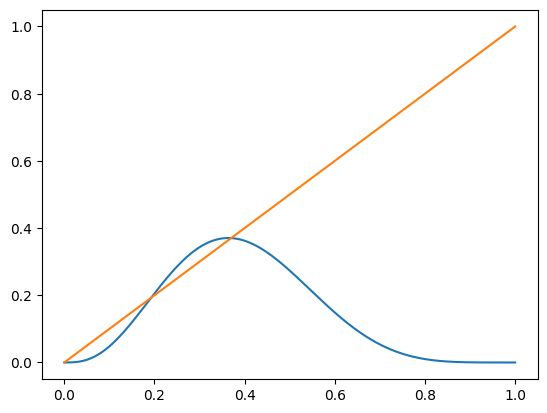

In [15]:
ps = np.linspace(0, 1, 1000)
plt.plot(ps, p_next(ps, *cgol))
plt.plot(ps, ps)

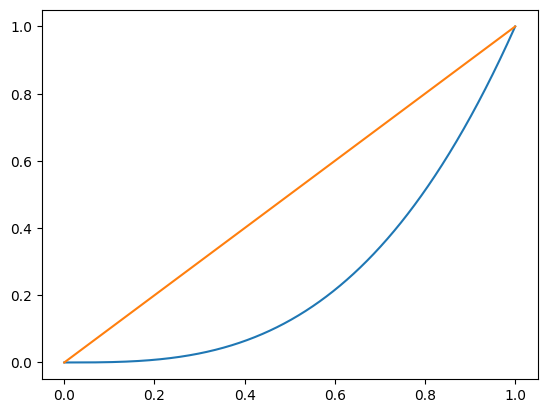

In [112]:
ps = np.linspace(0, 1, 1000)
plt.plot(ps, wall_next(ps, *cgol))
plt.plot(ps, ps)

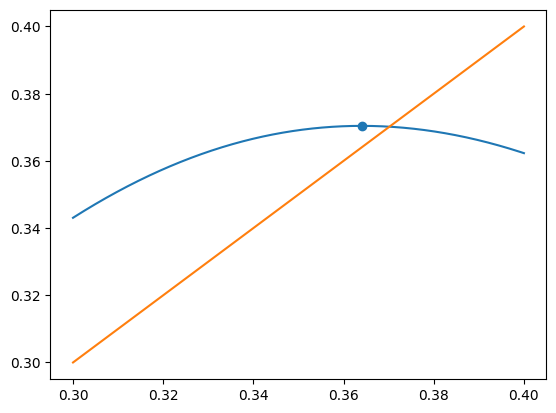

In [36]:
rule = cgol
ps = np.linspace(.3, .4, 1000)
max_p = max(ps, key=lambda p: p_next(p, *rule))
plt.plot(ps, p_next(ps, *rule))
plt.plot(ps, ps)
plt.scatter([max_p], [p_next(max_p, *rule)])

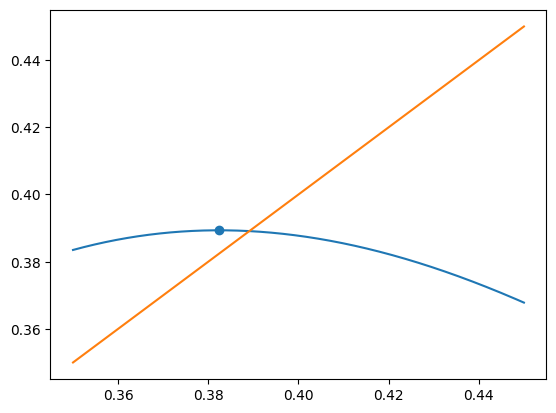

In [44]:
highlife = ((3, 6), (2, 3))
rule = ((3, 6, 8), (2, 3, 8))
ps = np.linspace(.35, .45, 1000)
max_p = max(ps, key=lambda p: p_next(p, *rule))
plt.plot(ps, p_next(ps, *rule))
plt.plot(ps, ps)
plt.scatter([max_p], [p_next(max_p, *rule)])

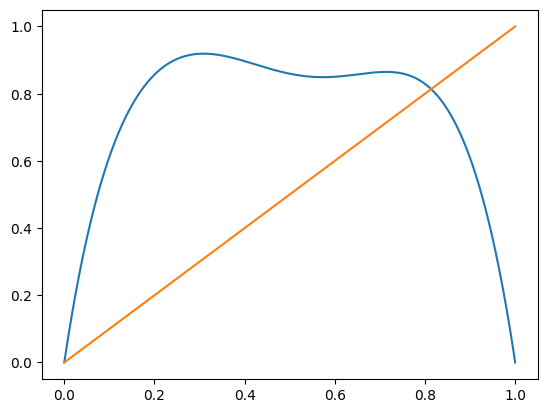

In [101]:
#rule = (5, 6, 8), (0, 3, 4, 5, 7, 8)
rule = (1, 2, 3, 4, 5, 6, 7, 8), (0, 1, 2, 3, 5, 6, 7)
ps = np.linspace(0, 1, 1000)
plt.plot(ps, p_next(ps, *rule))
plt.plot(ps, ps)

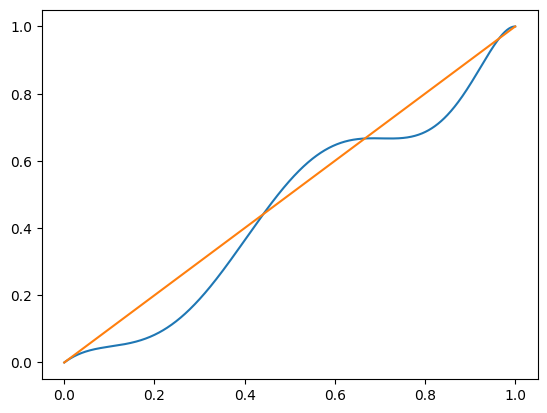

In [150]:
rule = (5, 6, 8), (0, 3, 4, 5, 7, 8)

#rule = (1, 2, 3, 4, 5, 6, 7, 8), (0, 1, 2, 3, 5, 6, 7)
ps = np.linspace(0, 1, 1000)
plt.plot(ps, p_next(ps, *rule))
plt.plot(ps, ps)

In [152]:
rulestring(*rule)

'B568/S034578'

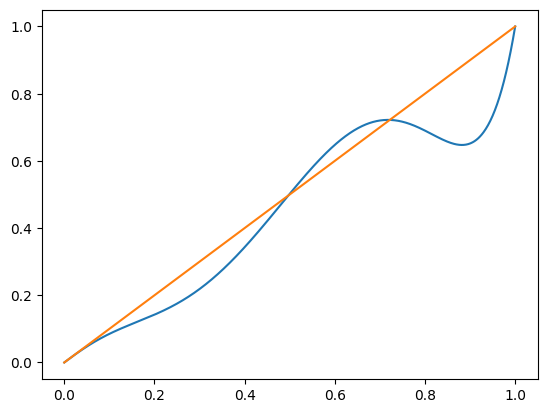

In [136]:
rule = (6, 7, 8), (0, 1, 3, 4, 5, 6, 8)
ps = np.linspace(0, 1, 1000)
plt.plot(ps, p_next(ps, *rule))
plt.plot(ps, ps)

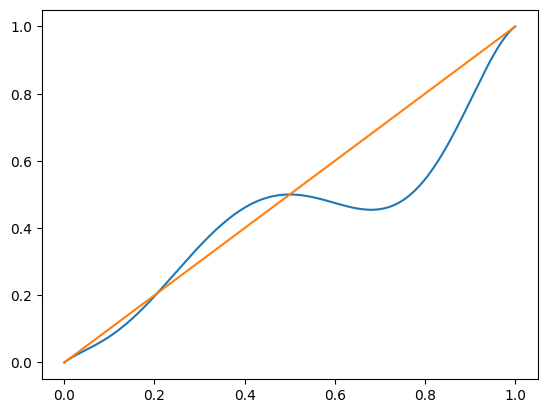

In [160]:
rule = ruletuple('B357/S03478')
ps = np.linspace(0, 1, 1000)
plt.plot(ps, p_next(ps, *rule))
plt.plot(ps, ps)

In [119]:
wall_next(ps, *rule)

0